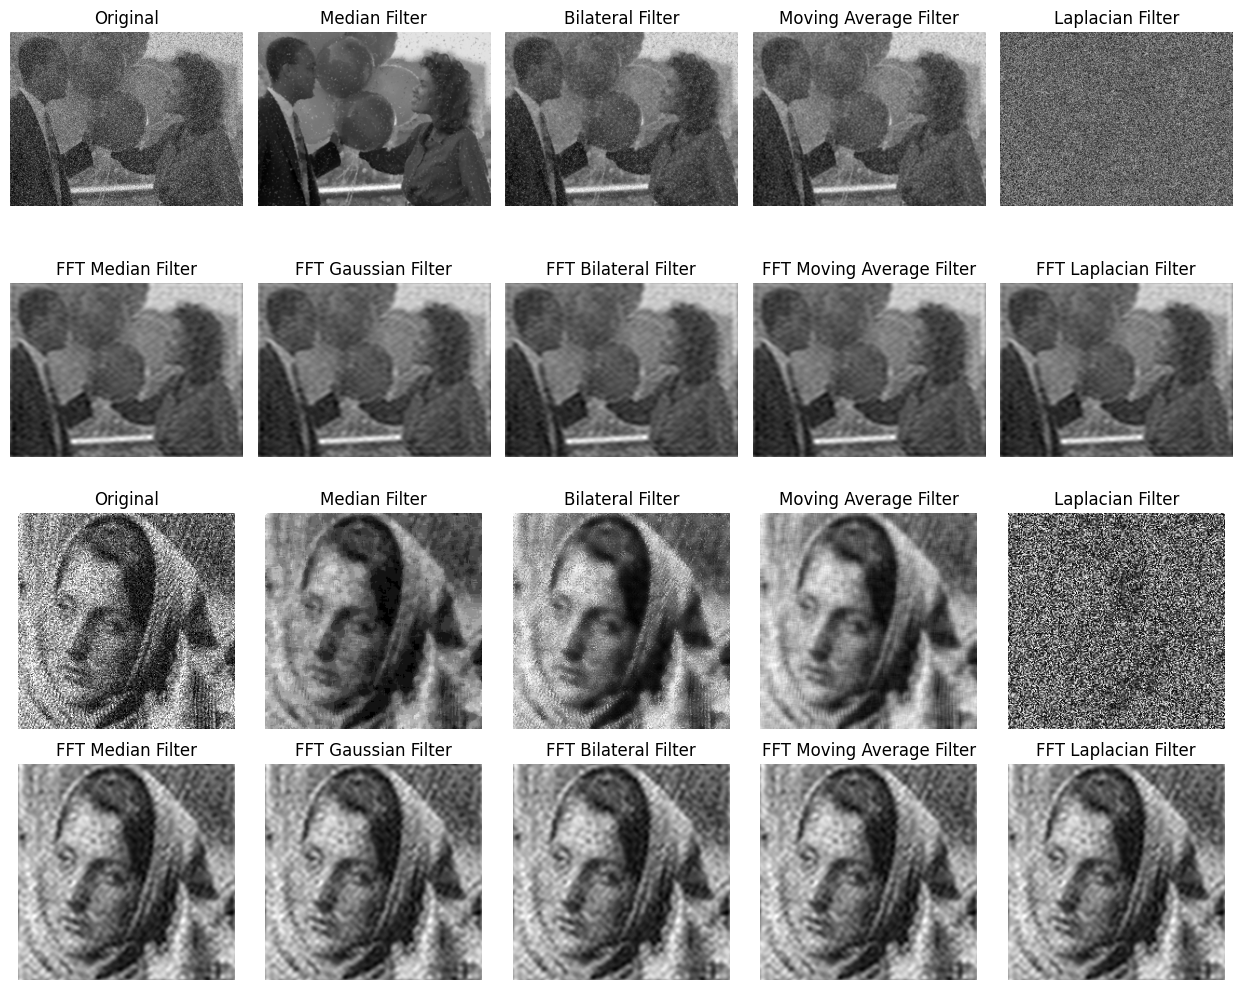

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image1 = cv2.imread('input_image1.jpg', 0)  # Load as grayscale
image2 = cv2.imread('input_image2.jpg', 0)  # Load as grayscale


def median_filter(image):
    filtered_image = cv2.medianBlur(image, 5)
    return filtered_image, "Median Filter"

def bilateral_filter(image):
    filtered_image = cv2.bilateralFilter(image, 9, 75, 75)
    return filtered_image, "Bilateral Filter"

def moving_average_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image, "Moving Average Filter"

def laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    filtered_image = np.uint8(np.abs(laplacian))
    return filtered_image, "Laplacian Filter"


filters_without_fft = [median_filter, bilateral_filter, moving_average_filter, laplacian_filter]


def fft_median_filter(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    radius = 30
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(img_back)
    return img_back, "FFT Median Filter"

def fft_gaussian_filter(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    radius = 30
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(img_back)
    return img_back, "FFT Gaussian Filter"

def fft_bilateral_filter(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    radius = 30
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(img_back)
    return img_back, "FFT Bilateral Filter"

def fft_moving_average_filter(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    radius = 30
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(img_back)
    return img_back, "FFT Moving Average Filter"

def fft_laplacian_filter(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    rows, cols = image.shape
    crow, ccol = rows//2, cols//2
    radius = 30
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(img_back)
    return img_back, "FFT Laplacian Filter"

filters_with_fft = [fft_median_filter, fft_gaussian_filter, fft_bilateral_filter, fft_moving_average_filter, fft_laplacian_filter]


plt.figure(figsize=(15, 10))


for i, filter_func in enumerate([median_filter] + filters_without_fft):
    plt.subplot(4, 6, i + 1)
    if i == 0:
        plt.imshow(image1, cmap='gray')
        plt.title('Original')
    else:
        filtered_image, filter_name = filter_func(image1)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(filter_name)
    plt.axis('off')


for i, filter_func in enumerate(filters_with_fft):
    plt.subplot(4, 6, 6 + i + 1)
    filtered_image, filter_name = filter_func(image1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(filter_name)
    plt.axis('off')


for i, filter_func in enumerate([median_filter] + filters_without_fft):
    plt.subplot(4, 6, 6 * 2 + i + 1)
    if i == 0:
        plt.imshow(image2, cmap='gray')
        plt.title('Original')
    else:
        filtered_image, filter_name = filter_func(image2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(filter_name)
    plt.axis('off')


for i, filter_func in enumerate(filters_with_fft):
    plt.subplot(4, 6, 6 * 3 + i + 1)
    filtered_image, filter_name = filter_func(image2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(filter_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch [1/5], Loss: 0.19728977978229523
Epoch [2/5], Loss: 0.18369373679161072
Epoch [3/5], Loss: 0.17102384567260742
Epoch [4/5], Loss: 0.15613144636154175
Epoch [5/5], Loss: 0.09744179248809814


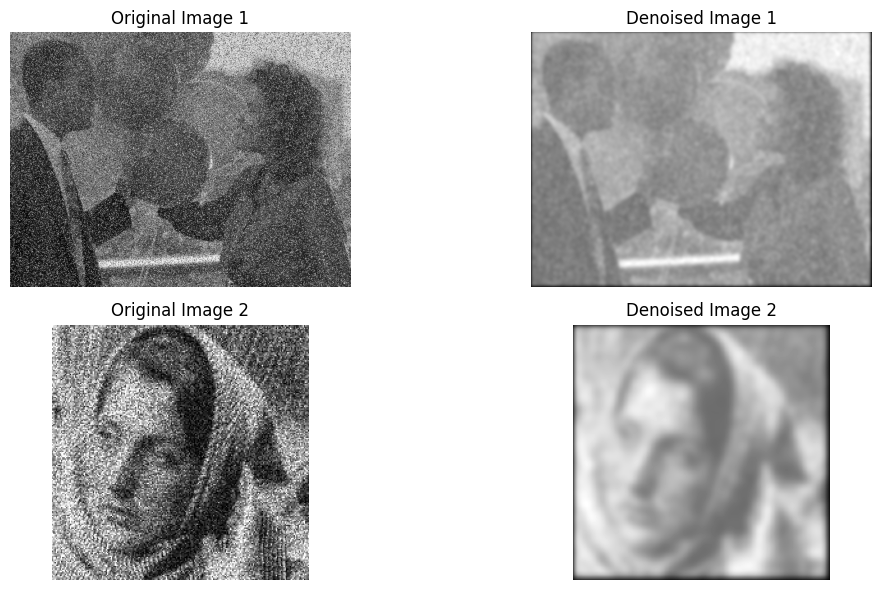

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


input_image1 = cv2.imread('input_image1.jpg', cv2.IMREAD_GRAYSCALE)
input_image2 = cv2.imread('input_image2.jpg', cv2.IMREAD_GRAYSCALE)

input_image1 = input_image1.astype('float32') / 255.0
input_image2 = input_image2.astype('float32') / 255.0

noisy_input_image1 = input_image1 + np.random.normal(loc=0, scale=0.1, size=input_image1.shape)
noisy_input_image2 = input_image2 + np.random.normal(loc=0, scale=0.1, size=input_image2.shape)

noisy_input_image1 = np.clip(noisy_input_image1, 0, 1)
noisy_input_image2 = np.clip(noisy_input_image2, 0, 1)

noisy_input_image1_tensor = torch.tensor(noisy_input_image1, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
noisy_input_image2_tensor = torch.tensor(noisy_input_image2, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
input_image1_tensor = torch.tensor(input_image1, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
input_image2_tensor = torch.tensor(input_image2, dtype=torch.float32).unsqueeze(0).unsqueeze(0)


class DnCNN(nn.Module):
    def __init__(self):
        super(DnCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            *[nn.Conv2d(64, 64, kernel_size=3, padding=1),
              nn.ReLU(inplace=True)] * 15,
            nn.Conv2d(64, 1, kernel_size=3, padding=1)
        )

    def forward(self, x):
        return self.conv_layers(x)


dncnn_model = DnCNN()

optimizer = optim.Adam(dncnn_model.parameters(), lr=0.001)
loss_function = nn.MSELoss()

num_epochs = 5
for epoch in range(num_epochs):
    optimizer.zero_grad()
    denoised_image1 = dncnn_model(noisy_input_image1_tensor)
    loss = loss_function(denoised_image1, input_image1_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


denoised_image1 = dncnn_model(noisy_input_image1_tensor).detach().squeeze().numpy()
denoised_image2 = dncnn_model(noisy_input_image2_tensor).detach().squeeze().numpy()


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(input_image1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(denoised_image1, cmap='gray')
plt.title('Denoised Image 1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(input_image2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(denoised_image2, cmap='gray')
plt.title('Denoised Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()
